<a href="https://colab.research.google.com/github/evewinter/ICD-SVR/blob/main/testsvmcasas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avaliação do modelo de SVM (Conjunto de Teste):
Mean Squared Error (MSE): 20214228932.099087
R² Score: 0.7212890488485373


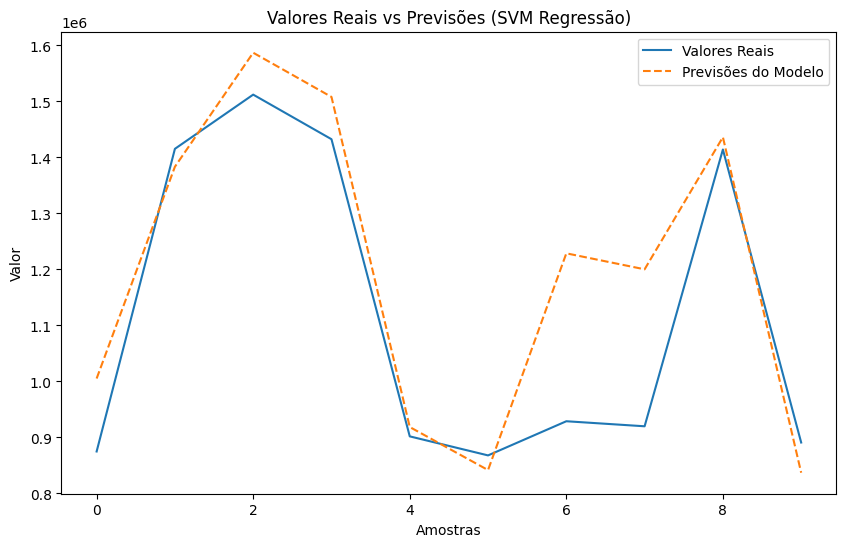

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('1. Casas.csv')

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

y_pred_train = svr_model.predict(X_train)
y_pred_test = svr_model.predict(X_test)

y_pred_train_inv = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1))
y_pred_test_inv = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

y_pred_test_inv = y_pred_test_inv.ravel()
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

print("Avaliação do modelo de SVM (Conjunto de Teste):")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_inv, y_pred_test_inv))
print("R² Score:", r2_score(y_test_inv, y_pred_test_inv))

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Valores Reais')
plt.plot(y_pred_test_inv, label='Previsões do Modelo', linestyle='--')
plt.title('Valores Reais vs Previsões (SVM Regressão)')
plt.xlabel('Amostras')
plt.ylabel('Valor')
plt.legend()
plt.show()